# Week 8 Assignment


Rishav Chaudhary

Presidential Graduate School, Kathmandu, Nepal

PRG 330: Python Programming for Data

Professor Tek Raj Panta

December 11, 2024

# GDP Growth Predicion

## Objective
**Predict Nepal's Growth based on economic indicators**

## Loading and Exploring Data

### GDP

In [2]:
import pandas as pd
from IPython.display import display
import numpy as np

# Loading Data
gdp = pd.read_excel("data/macro-economic-indicators/GDP.xlsx")

display(gdp.head())

,Year,GDP,Per Capita,Growth,Trade Balance (USD Billion),% of GDP,Contribution of Manufactoring Industry to GDP,No of People Going for Foreign Employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,-6.1585,3.284541,0
1,1966,0.906812,81.1644,7.0406,-0.028219,-3.1119,3.430308,0
2,1967,0.841974,73.9679,-1.5715,-0.000656,-0.0779,3.413874,0
3,1968,0.772229,66.5489,0.6755,-0.005060,-0.6552,3.568939,0
4,1969,0.788642,66.6383,4.4634,-0.025284,-3.2060,3.844709,0


In [3]:
print(gdp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           57 non-null     int64  
 1   GDP                                            57 non-null     float64
 2   Per Capita                                     57 non-null     float64
 3   Growth                                         57 non-null     float64
 4   Trade Balance (USD Billion)                    57 non-null     float64
 5   % of GDP                                       57 non-null     float64
 6   Contribution of Manufactoring Industry to GDP  57 non-null     float64
 7   No of People Going for Foreign Employment      57 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 3.7 KB
None


### Inflation

In [4]:
import pandas as pd

inflation = pd.read_excel('data/macro-economic-indicators/Inflation.xlsx')
display(inflation.head())


,Year,Month,Index,Change
0,2017.0,July,118.3,2.3
1,2017.0,August,119.4,3.4
2,2017.0,September,119.2,3.1
3,2017.0,October,120.6,3.9
4,2017.0,November,119.9,4.2


## Data Preprocessing and Data Cleaning

### Handling missing values in inflation

In [5]:
invalid_years = inflation['Year'].isna() | ~inflation['Year'].apply(lambda x: str(x).replace('.', '').isdigit())

if invalid_years.any():
    print("Invalid or missing 'Year' values found:")
    print(inflation[invalid_years])
    # Drop rows with invalid Year
    inflation = inflation[~invalid_years]



Invalid or missing 'Year' values found:
    Year Month  Index  Change
12   NaN   NaN    NaN     NaN
25   NaN   NaN    NaN     NaN
38   NaN   NaN    NaN     NaN
64   NaN   NaN    NaN     NaN


### Month Mapping and inflation data preparation

In [6]:
# Inflation dataset preprocessing
month_mapping = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

inflation['Month'] = inflation['Month'].map(month_mapping)
inflation['Date'] = pd.to_datetime(inflation['Year'].astype(int).astype(str) + '-' + inflation['Month'] + '-01', errors="coerce")
inflation = inflation[['Date', 'Index', 'Change']]


### GDP data preprocessing according to months

In [7]:
# Expanding GDP dataset
new_gdp = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for _, row in gdp.iterrows():
    year = int(row['Year'])
    for month in months:
        date = f"{year}-{month}-01"
        new_row = [date] + row[1:].tolist()
        new_gdp.append(new_row)

new_gdp = pd.DataFrame(new_gdp, columns=['Date', 'GDP', 'Per Capita', 'Growth', 'Trade Balance (USD Billion)', '% of GDP', 'Contribution of Manufactoring Industry to GDP', 'No of People Going for Foreign Employment'])
new_gdp['Date'] = pd.to_datetime(new_gdp['Date'])


### Merging new_gdp with inflation on ``Date``

In [8]:
# Merging GDP with Inflation
new_gdp_inflation_data = pd.merge(new_gdp, inflation, on='Date', how='left')

display(new_gdp_inflation_data.head())


,Date,GDP,Per Capita,Growth,Trade Balance (USD Billion),% of GDP,Contribution of Manufactoring Industry to GDP,No of People Going for Foreign Employment,Index,Change
0,1965-01-01,0.735267,67.0075,-1.2032,-0.045282,-6.1585,3.284541,0.0,NaN,NaN
1,1965-02-01,0.735267,67.0075,-1.2032,-0.045282,-6.1585,3.284541,0.0,NaN,NaN
2,1965-03-01,0.735267,67.0075,-1.2032,-0.045282,-6.1585,3.284541,0.0,NaN,NaN
3,1965-04-01,0.735267,67.0075,-1.2032,-0.045282,-6.1585,3.284541,0.0,NaN,NaN
4,1965-05-01,0.735267,67.0075,-1.2032,-0.045282,-6.1585,3.284541,0.0,NaN,NaN


### Renaming columns for consistency

In [9]:
new_gdp_inflation_data.columns

Index(['Date', 'GDP', 'Per Capita', 'Growth', 'Trade Balance (USD Billion)',
       '% of GDP', 'Contribution of Manufactoring Industry to GDP',
       'No of People Going for Foreign Employment', 'Index', 'Change'],
      dtype='object')

In [10]:
# Rename the columns
new_gdp_inflation_data.rename(columns={
    'Date': 'date',
    'GDP': 'gdp',
    'Per Capita': 'per_capita',
    'Growth': 'growth',
    'Trade Balance (USD Billion)': 'trade_balance_usd_billion',
    '% of GDP': 'percent_of_gdp',
    'Contribution of Manufactoring Industry to GDP': 'manufacturing_contribution_to_gdp',
    'No of People Going for Foreign Employment': 'foreign_employment_count',
    'Index': 'index',
    'Change': 'change'
}, inplace=True)

# checking columns name
display(new_gdp_inflation_data.columns)

Index(['date', 'gdp', 'per_capita', 'growth', 'trade_balance_usd_billion',
       'percent_of_gdp', 'manufacturing_contribution_to_gdp',
       'foreign_employment_count', 'index', 'change'],
      dtype='object')

### checking missing values in merged_data

In [11]:
# Checking for missing values
display(new_gdp_inflation_data.isna().sum())

date                                   0
gdp                                    0
per_capita                             0
growth                                 0
trade_balance_usd_billion              0
percent_of_gdp                         0
manufacturing_contribution_to_gdp      0
foreign_employment_count               0
index                                630
change                               630
dtype: int64

### handling missing values

Since,here, mean will not work for it, and opting for dropping the values.

In [12]:
# dropping missing values
new_gdp_inflation_data.dropna(subset=['index', 'change'], inplace=True)

# Again checking for missing values
display(new_gdp_inflation_data.isna().sum())


date                                 0
gdp                                  0
per_capita                           0
growth                               0
trade_balance_usd_billion            0
percent_of_gdp                       0
manufacturing_contribution_to_gdp    0
foreign_employment_count             0
index                                0
change                               0
dtype: int64

In [13]:
print(new_gdp_inflation_data['growth'].describe())

count    54.000000
mean      4.587878
std       4.027630
min      -2.369600
25%       4.246900
50%       6.657100
75%       7.622400
max       8.977300
Name: growth, dtype: float64


## Feature Engineering

### Trying to find out which target variable can be used, using correlation

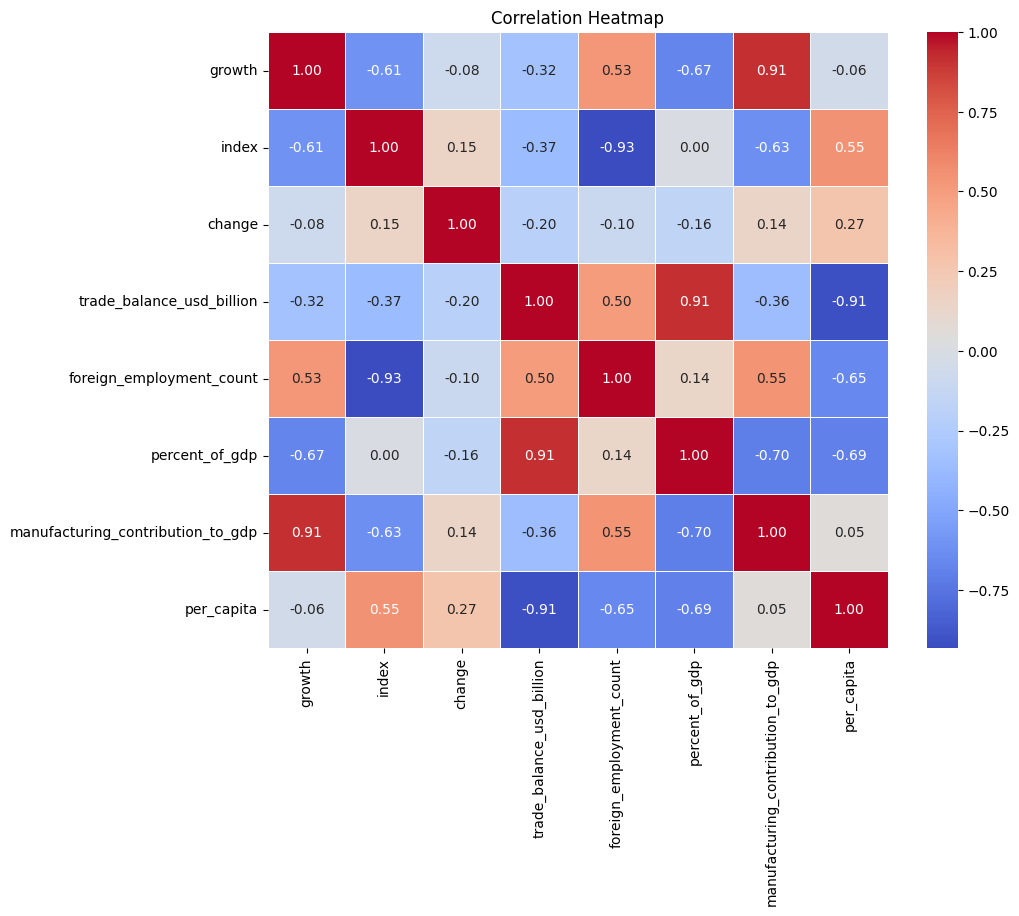

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting heatmap
corr = new_gdp_inflation_data[[
    "growth",
    "index", 
    "change", 
    "trade_balance_usd_billion", 
    "foreign_employment_count", 
    "percent_of_gdp", 
    "manufacturing_contribution_to_gdp", 
    "per_capita"
]].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Selecting features and target
**Features**

- For ``inflation``: ``index`` and ``change``
- For ``Trade Balance``: ``trade_balance_usd_billion``
- For ``remittance``: Using ``foreign_employment_count`` as proxy

- Also, adding other economic indicators available

**Target**
- ``growth`` column is being taken since it signifies gdp growth

In [15]:
# Selecting features and target

# Selecting features
x = new_gdp_inflation_data[[
    "index", # inflation
    "change", # inflation
    "trade_balance_usd_billion", # trade_balance
    "foreign_employment_count", # remittance proxy
    "percent_of_gdp", # other economic indicators
    "manufacturing_contribution_to_gdp", # other economic indicators
    "per_capita"
]]

# Selecting target variable
y = new_gdp_inflation_data["growth"]

# Checking missing values in x
print(x.isna().sum())

index                                0
change                               0
trade_balance_usd_billion            0
foreign_employment_count             0
percent_of_gdp                       0
manufacturing_contribution_to_gdp    0
per_capita                           0
dtype: int64


In [16]:
# Calculate correlation matrix
correlation_matrix = new_gdp_inflation_data[[
    "growth",
    "index", 
    "change", 
    "trade_balance_usd_billion", 
    "foreign_employment_count", 
    "percent_of_gdp", 
    "manufacturing_contribution_to_gdp", 
    "per_capita"
]].corr()

# Display correlation with target variable ('growth')
print(correlation_matrix["growth"])


growth                               1.000000
index                               -0.607891
change                              -0.076569
trade_balance_usd_billion           -0.321995
foreign_employment_count             0.530919
percent_of_gdp                      -0.673037
manufacturing_contribution_to_gdp    0.909991
per_capita                          -0.055959
Name: growth, dtype: float64


### Splitting the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Scaling the features

- It is mainly for the Linear Regression
- As for other tree models, we do not need to scale it in uniform range.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Implementation
- Linear Regression
- RandomForestRegressor
- Gradient Boosting

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

# Loading the Model
linear_model = LinearRegression()

# Fitting model on training dataset (features is scaled while target is not)
linear_model.fit(X_train_scaled, y_train)

# Predicting value
y_pred_linear = linear_model.predict(X_test_scaled)


### Random Forest Regressor

In [20]:
print(X_train_scaled.dtype)
print(y_train.dtype)


float64
float64


#### Using Hyperparameter Tuning 
- using GridSearchCV 

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

# Define the model
random_forest = RandomForestRegressor(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500, 875],
    'max_depth': [10, 20, 30, 44],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# intializing
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predicting using the best model
y_pred_random_forest = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Gradient Boost Regressor

-  using hyperparameter tuning ``GridSearchCV``


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Loading the Model
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Hyperparameters to tune
param_grid_gradient = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gradient, cv=3, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predicting using the best model
y_pred_gradient_boosting = grid_search.best_estimator_.predict(X_test_scaled)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.8}


## Model Evaluation

### Linear Regression

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Evaluation:")
print(f"Mean Absolute Error: {mae_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"r2_score: {r2_linear:.4f}")

Linear Regression Evaluation:
Mean Absolute Error: 0.0000
RMSE: 0.0000
r2_score: 1.0000


This model performed perfectly with no errors indicating the overfitting of the data, and the model is too closely aligned with the training data.

### Random Forest Regressor

In [30]:
# Random Forest Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_random_forest)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))
r2_rf = r2_score(y_test, y_pred_random_forest)

print("\nRandom Forest Evaluation:")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


Random Forest Evaluation:
Mean Absolute Error: 0.0572
RMSE: 0.1236
R²: 0.9984


### Gradient Boost Regressor


In [31]:
# Gradient Boosting Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gradient_boosting)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gradient_boosting))
r2_gb = r2_score(y_test, y_pred_gradient_boosting)

print("\nGradient Boosting Evaluation:")
print(f"Mean Absolute Error: {mae_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R²: {r2_gb:.4f}")


Gradient Boosting Evaluation:
Mean Absolute Error: 0.0013
RMSE: 0.0029
R²: 1.0000
